In [13]:

import ast
import pandas as pd
import os

# Load the CSV file into a DataFrame
df = pd.read_csv('combined_text_collector_aug7.csv')
df.head()

def extract_filename(path):
    base_name = os.path.basename(path)
    return os.path.splitext(base_name)[0]
df['Location'] = df['Location'].apply(extract_filename)



columns_to_apply = ['Weights_Matches', 'Weight Values', 'Weight Result','+-250_Text']
for column in columns_to_apply:
    df[column] = df[column].apply(ast.literal_eval)



# Function to unpack one layer of nesting
def unpack_nested_list(nested_list):
    if isinstance(nested_list, list) and len(nested_list) == 1 and isinstance(nested_list[0], list):
        return nested_list[0]
    return nested_list

# Apply the function to the 'Weight Values' column
df['Weight Values'] = df['Weight Values'].apply(unpack_nested_list)


df


,Location,Measure,Initial_Match,Num_Matches_Found,+-250_Text,Weights_Matches,Weight Values,Weight Result
0,AZ_Glendale,1. Restrict NONE permits?*1.0,growth management,0,[],[],[],[]
1,AZ_Glendale,1. Restrict NONE permits?*1.0,growth control,0,[],[],"[[], []]",[]
2,AZ_Glendale,1. Restrict NONE permits?*1.0,growth rate,0,[],[],"[[], [], []]",[]
3,AZ_Glendale,1. Restrict NONE permits?*1.0,development approvals,0,[],[],"[[], [], [], []]",[]
4,AZ_Glendale,2. Restrict number of NONE authorized for cons...,growth management,0,[],[],[],[]
...,...,...,...,...,...,...,...,...
44858,WI_Sturtevant,4. Restrict number of NONE units?*1.0,growth management,0,[],[],[],[]
44859,WI_Sturtevant,4. Restrict number of NONE units?*1.0,growth control,0,[],[],"[[], []]",[]
44860,WI_Sturtevant,4. Restrict number of NONE units?*1.0,growth rate,0,[],[],"[[], [], []]",[]
44861,WI_Sturtevant,4. Restrict number of NONE units?*1.0,development approvals,0,[],[],"[[], [], [], []]",[]


In [14]:
df['Weight Values'] = df['Weight Values'].tolist()
df

,Location,Measure,Initial_Match,Num_Matches_Found,+-250_Text,Weights_Matches,Weight Values,Weight Result
0,AZ_Glendale,1. Restrict NONE permits?*1.0,growth management,0,[],[],[],[]
1,AZ_Glendale,1. Restrict NONE permits?*1.0,growth control,0,[],[],"[[], []]",[]
2,AZ_Glendale,1. Restrict NONE permits?*1.0,growth rate,0,[],[],"[[], [], []]",[]
3,AZ_Glendale,1. Restrict NONE permits?*1.0,development approvals,0,[],[],"[[], [], [], []]",[]
4,AZ_Glendale,2. Restrict number of NONE authorized for cons...,growth management,0,[],[],[],[]
...,...,...,...,...,...,...,...,...
44858,WI_Sturtevant,4. Restrict number of NONE units?*1.0,growth management,0,[],[],[],[]
44859,WI_Sturtevant,4. Restrict number of NONE units?*1.0,growth control,0,[],[],"[[], []]",[]
44860,WI_Sturtevant,4. Restrict number of NONE units?*1.0,growth rate,0,[],[],"[[], [], []]",[]
44861,WI_Sturtevant,4. Restrict number of NONE units?*1.0,development approvals,0,[],[],"[[], [], [], []]",[]


In [15]:
type(df['Weight Values'][0])

list

In [16]:
weight_values_types = df['Weight Values'].apply(type).unique()
weight_values_types

array([<class 'list'>], dtype=object)

In [17]:
for index, row in df.iterrows():
    if len(row['Weight Values']) != len(row['Weights_Matches']):
        if len(row['Weight Values']) > 1:
            df.at[index, 'Weight Values'] = row['Weight Values'][-1]



df.head()


,Location,Measure,Initial_Match,Num_Matches_Found,+-250_Text,Weights_Matches,Weight Values,Weight Result
0,AZ_Glendale,1. Restrict NONE permits?*1.0,growth management,0,[],[],[],[]
1,AZ_Glendale,1. Restrict NONE permits?*1.0,growth control,0,[],[],[],[]
2,AZ_Glendale,1. Restrict NONE permits?*1.0,growth rate,0,[],[],[],[]
3,AZ_Glendale,1. Restrict NONE permits?*1.0,development approvals,0,[],[],[],[]
4,AZ_Glendale,2. Restrict number of NONE authorized for cons...,growth management,0,[],[],[],[]


In [18]:
new_rows = []


    
# Iterate through the DataFrame
for index, row in df.iterrows():
    # If 'Num_Matches_Found' is greater than 1, append the duplicated rows
    if row['Num_Matches_Found'] > 1:
        for i in range(row['Num_Matches_Found']):
            copied_row = row.copy()
            copied_row['Num_Matches_Found'] = 1
            copied_row['+-250_Text'] = copied_row['+-250_Text'][i]
            new_rows.append(copied_row)
    else:
        new_rows.append(row)      
        
# Reset the original row's 'Num_Matches_Found' to 1
new_rows[-(row['Num_Matches_Found'])]['Num_Matches_Found'] = 1

# Create a new DataFrame from the new rows list
df = pd.DataFrame(new_rows)

# Reset index to maintain consistency
df.reset_index(drop=True, inplace=True)
#df.to_csv('output1.csv', index=False)


# Assuming df is your DataFrame
new_rows = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    num_matches=0
    num_matches = len(row['Weights_Matches'])
    len_weight_val_num_matches = len(row['Weight Values'])
    len_weight_match_num_matches = len(row['Weights_Matches'])
    if num_matches > 1:
        for i in range(num_matches):
            copied_row = row.copy()
            copied_row['Weights_Matches'] = copied_row['Weights_Matches'][i]
            #print(row)
            copied_row['Weight Values'] = copied_row['Weight Values'][i]
            copied_row['Weight Result'] = copied_row['Weight Result'][i]
            new_rows.append(copied_row)
    else:
        copied_row = row.copy()
        copied_row['Weight Values'] = []
        new_rows.append(copied_row)


# Create a new DataFrame from the new rows list
df = pd.DataFrame(new_rows)
# Reset index to maintain consistency
df.reset_index(drop=True, inplace=True)

# Display the first few rows of the dataframe
df.head()

,Location,Measure,Initial_Match,Num_Matches_Found,+-250_Text,Weights_Matches,Weight Values,Weight Result
0,AZ_Glendale,1. Restrict NONE permits?*1.0,growth management,1,[],[],[],[]
1,AZ_Glendale,1. Restrict NONE permits?*1.0,growth control,0,[],[],[],[]
2,AZ_Glendale,1. Restrict NONE permits?*1.0,growth rate,0,[],[],[],[]
3,AZ_Glendale,1. Restrict NONE permits?*1.0,development approvals,0,[],[],[],[]
4,AZ_Glendale,2. Restrict number of NONE authorized for cons...,growth management,0,[],[],[],[]


In [19]:
def extract_filename(path):
    """
    Extracts the filename without extension from a given file path.

    Parameters:
    path (str): The file path from which to extract the filename.

    Returns:
    str: The filename without its extension.
    """
    import os
    # Extract the base name of the file (e.g., 'AZ_Glendale.txt')
    base_name = os.path.basename(path)
    # Split the base name by '.' and return the first part (e.g., 'AZ_Glendale')
    return os.path.splitext(base_name)[0]


df['Location'] = df['Location'].apply(extract_filename)
df = df.set_index('Location')
df = df.sort_index()
df

,Measure,Initial_Match,Num_Matches_Found,+-250_Text,Weights_Matches,Weight Values,Weight Result
Location,,,,,,,
AK_Anchorage,1. Restrict NONE permits?*1.0,growth management,0,[],[],[],[]
AK_Anchorage,4. Restrict number of NONE units?*1.0,minimum additional lot area,0,[],[],[],[]
AK_Anchorage,4. Restrict number of NONE units?*1.0,development approvals,0,[],[],[],[]
AK_Anchorage,4. Restrict number of NONE units?*1.0,growth rate,0,[],[],[],[]
AK_Anchorage,4. Restrict number of NONE units?*1.0,growth control,0,[],[],[],[]
...,...,...,...,...,...,...,...
WY_Rawlins,4. Restrict number of NONE units?*1.0,growth management,0,[],[],[],[]
WY_Rawlins,3. Restrict number of NONE?*1.0,development approvals,0,[],[],[],[]
WY_Rawlins,3. Restrict number of NONE?*1.0,growth rate,0,[],[],[],[]


In [20]:

df.to_csv('processed_combined_text_collector_aug7.csv', index=True)

In [21]:
filtered_df = df[df['Num_Matches_Found'] != 0]


In [22]:
filtered_df.to_csv('filtered_data.csv')

<Axes: title={'center': 'Most Common Initial Match'}, xlabel='Initial_Match'>

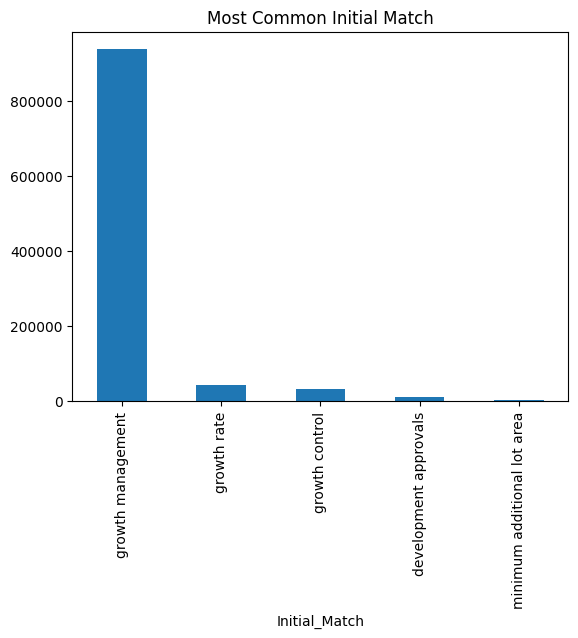

In [23]:
df['Initial_Match'].value_counts().plot(kind='bar', title='Most Common Initial Match')

In [24]:
unique_entries = df['Initial_Match'].unique()
print(unique_entries)

['growth management' 'minimum additional lot area' 'development approvals'
 'growth rate' 'growth control']
